# Catalan Numbers and Dyck Words

One of the, I suspect, most important ways in which Catalan Numbers emerge is that they give the count of Dyck Words.

## Dyck Words

Dyck Words are strings consisting of two symbols, for example '[' and ']', so that there is an equal number of '[' and ']', and at any given point there are at least as many '[' as there are ']'. In this case, Dyck words of length $2n$ are the different ways in which $n$ pairs of balanced brackets can be arranged.

I.e.:

'[[][]]' is a Dyck word.

'[]][][' is not a Dyck word.

The number of Dyck words of length $2n$ is given by the Catalan number $C_n = \frac{1}{n+1}\left(\begin{array}{c}2n\\n\end{array}\right)$.


## Catalan Numbers

Wikipedia has a few ways for deriving the Catalan numbers. I found it useful to just systematically count paths. You go through the grid and you label the edges by keeping track of "inflow". This doesn't easily get you to a closed-form solution, but it generalizes well for these lattice-path type of problems.

<img src="img/catalan.jpeg" style="width: 400px">

You can label each of the grid points with the amount of paths flowing through them:

\begin{equation}
f(x,y) = f(x-1,y) + f(x,y-1)\\ \forall x\geq y
\end{equation}

\begin{equation}
f(x,y) = 0\ \mathrm{otherwise}
\end{equation}

Which works out to:

\begin{equation}
f(x,y) = \sum^x_{k=y}f(k,y-1)
\end{equation}

With boundary condition:

\begin{equation}
f(x,0) = 1\\ \forall x\geq y
\end{equation}

\begin{equation}
f(x,0) = 0\ \mathrm{otherwise}
\end{equation}

In [1]:
import numpy as np


def print_grid_long(N):
    """
    Print the path density on the grid. (long formula)
    """
    Grid = np.zeros([N,N])
    for x in range(Grid.shape[0]):
        for y in range(Grid.shape[1]):

            # boundary
            if y == 0:
                if x >= 0:
                    Grid[x,y] = 1

            elif y <= x:
                Grid[x,y] = int(Grid[x-1,y] + Grid[x,y-1])
                
            else:
                pass

    f = lambda s : str(s) if s!=0 else '-'
    y_len = len(Grid[0])
    for x in Grid:
        print(y_len*'%s\t' % tuple([f(int(i))  for i in x]))
        
    return Grid
        
        
def print_grid_short(N):
    """
    Print the path density on the grid. (short formula)
    """
    Grid = np.zeros([N,N])
    for x in range(Grid.shape[0]):
        for y in range(Grid.shape[1]):

            # boundary
            if y == 0:
                if x >= 0:
                    Grid[x,y] = 1
                    
            else:
                Grid[x,y] = np.sum(Grid[y:x+1,y-1])
                
    f = lambda s : str(s) if s!=0 else '-'
    y_len = len(Grid[0])
    for x in Grid:
        print(y_len*'%s\t' % tuple([f(int(i))  for i in x]))
        
    return Grid
        
_ = print_grid_short(16)

1	-	-	-	-	-	-	-	-	-	-	-	-	-	-	-	
1	1	-	-	-	-	-	-	-	-	-	-	-	-	-	-	
1	2	2	-	-	-	-	-	-	-	-	-	-	-	-	-	
1	3	5	5	-	-	-	-	-	-	-	-	-	-	-	-	
1	4	9	14	14	-	-	-	-	-	-	-	-	-	-	-	
1	5	14	28	42	42	-	-	-	-	-	-	-	-	-	-	
1	6	20	48	90	132	132	-	-	-	-	-	-	-	-	-	
1	7	27	75	165	297	429	429	-	-	-	-	-	-	-	-	
1	8	35	110	275	572	1001	1430	1430	-	-	-	-	-	-	-	
1	9	44	154	429	1001	2002	3432	4862	4862	-	-	-	-	-	-	
1	10	54	208	637	1638	3640	7072	11934	16796	16796	-	-	-	-	-	
1	11	65	273	910	2548	6188	13260	25194	41990	58786	58786	-	-	-	-	
1	12	77	350	1260	3808	9996	23256	48450	90440	149226	208012	208012	-	-	-	
1	13	90	440	1700	5508	15504	38760	87210	177650	326876	534888	742900	742900	-	-	
1	14	104	544	2244	7752	23256	62016	149226	326876	653752	1188640	1931540	2674440	2674440	-	
1	15	119	663	2907	10659	33915	95931	245157	572033	1225785	2414425	4345965	7020405	9694845	9694845	


In [2]:
import matplotlib.pyplot as plt
import numpy as np

def dyck_words(n):
    """
    return all dyck words of length n
    """
    assert n%2 == 0 # has to be an even number

    if n == 0:
        return ''
    
    elif n == 2:
        yield 'XY'
        
    else:
        W = 'X'
        X_count = 1
        
        for letter in 'YX':
            
            if letter == 'Y':
                for word in dyck_words(n-2):
                    # equal to XY + Dyck(n-2)
                    yield W +'Y' + word
                    
            elif letter == 'X' and X_count < n/2:
                X_count += 1
                results = set()
                for word in dyck_words(n-2):
                    
                    """
                    add a Y somewhere after any X of the remaining dyck words
                    
                    this works, but it creates duplicates that will fill up memory. 
                    
                    will have to figure out something smarter when there's time.
                    
                    """ 
                    
                    for i in range(n-2):
                        if word[i] == 'X':
                            res = W + word[:i+1]+'Y'+word[i+1:]
                            if res not in results:
                                results.update([res])
                                yield res
                            else:
                                pass
                            
    
def factorial(x):
    if x == 0: 
        return 1
    else:
        res = 1
        for i in range(1,x+1):
            res *= i
    return res 

def catalan(n):
    return int((1/(n+1))*(factorial(2*n)/(factorial(n)**2)))
                        
                        
def plot_mountain_range(n):
    """
    One way to illustrate Dyck Words is to look at 'mountain ranges' of length n=2k,
    where mountains never dip below the horizon
    """
    
    code = {'X':1,'Y':-1}
    
    fig = plt.figure(figsize=(12,7))
    ax = plt.subplot()
    
    offset = 0
    
    words = sorted(list(dyck_words(n)))[::-1]
    
    for word in words:
        mountains = [code[letter] for letter in word]
        
        ax.plot(offset+np.hstack([[0],np.cumsum(mountains)]),color='royalblue',alpha=0.1)
        
        offset += 0.002
    
    #ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    pass
    

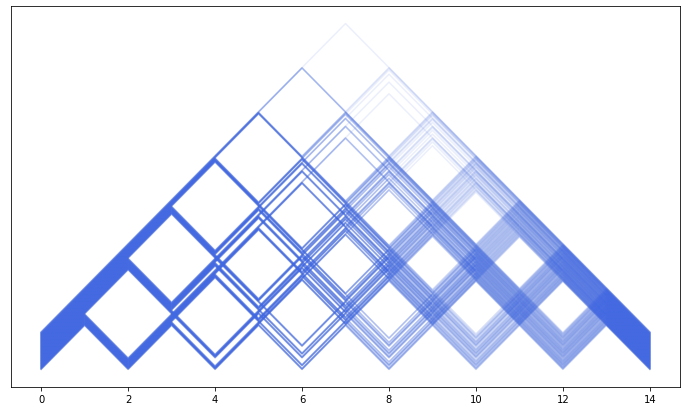

In [3]:
plot_mountain_range(14)

In [4]:
for k in range(10):
    n = 2*k
    
    count = 0
    for word in dyck_words(n):
        count += 1
    
    cn = catalan(k)
    
    print('2n=%i Catalan_n: %i Dyck words: %i' % (n,cn,count))

2n=0 Catalan_n: 1 Dyck words: 0
2n=2 Catalan_n: 1 Dyck words: 1
2n=4 Catalan_n: 2 Dyck words: 2
2n=6 Catalan_n: 5 Dyck words: 5
2n=8 Catalan_n: 14 Dyck words: 14
2n=10 Catalan_n: 42 Dyck words: 42
2n=12 Catalan_n: 132 Dyck words: 132
2n=14 Catalan_n: 429 Dyck words: 429
2n=16 Catalan_n: 1430 Dyck words: 1430
2n=18 Catalan_n: 4862 Dyck words: 4862


In [5]:
# just checking.

a = print_grid_long(15)
b = print_grid_short(15)
assert np.all(a == b)

1	-	-	-	-	-	-	-	-	-	-	-	-	-	-	
1	1	-	-	-	-	-	-	-	-	-	-	-	-	-	
1	2	2	-	-	-	-	-	-	-	-	-	-	-	-	
1	3	5	5	-	-	-	-	-	-	-	-	-	-	-	
1	4	9	14	14	-	-	-	-	-	-	-	-	-	-	
1	5	14	28	42	42	-	-	-	-	-	-	-	-	-	
1	6	20	48	90	132	132	-	-	-	-	-	-	-	-	
1	7	27	75	165	297	429	429	-	-	-	-	-	-	-	
1	8	35	110	275	572	1001	1430	1430	-	-	-	-	-	-	
1	9	44	154	429	1001	2002	3432	4862	4862	-	-	-	-	-	
1	10	54	208	637	1638	3640	7072	11934	16796	16796	-	-	-	-	
1	11	65	273	910	2548	6188	13260	25194	41990	58786	58786	-	-	-	
1	12	77	350	1260	3808	9996	23256	48450	90440	149226	208012	208012	-	-	
1	13	90	440	1700	5508	15504	38760	87210	177650	326876	534888	742900	742900	-	
1	14	104	544	2244	7752	23256	62016	149226	326876	653752	1188640	1931540	2674440	2674440	
1	-	-	-	-	-	-	-	-	-	-	-	-	-	-	
1	1	-	-	-	-	-	-	-	-	-	-	-	-	-	
1	2	2	-	-	-	-	-	-	-	-	-	-	-	-	
1	3	5	5	-	-	-	-	-	-	-	-	-	-	-	
1	4	9	14	14	-	-	-	-	-	-	-	-	-	-	
1	5	14	28	42	42	-	-	-	-	-	-	-	-	-	
1	6	20	48	90	132	132	-	-	-	-	-	-	-	-	
1	7	27	75	165	297	429	429	-	-	-	-	-	-	-	
1